In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
from warnings import filterwarnings


# Visualizations Libraries
import plotly.express as px
import missingno as msno

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
# Adding imports for model saving
import pickle
import joblib
from google.colab import drive
import os


# Modelling Libraries
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.utils import shuffle, resample
from xgboost import XGBClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold

In [3]:
colors_primary = ['#01411C', '#4B6F44', '#4F7942', '#101144', '#D0F0C0']
colors_secondary = ["#132C33", "#264D58", '#17869E', '#6f85ff', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']

binsize=40
opacity=0.8

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/AakarshShreshth/AI_ML_Lab/main/water_potability.csv')

In [5]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


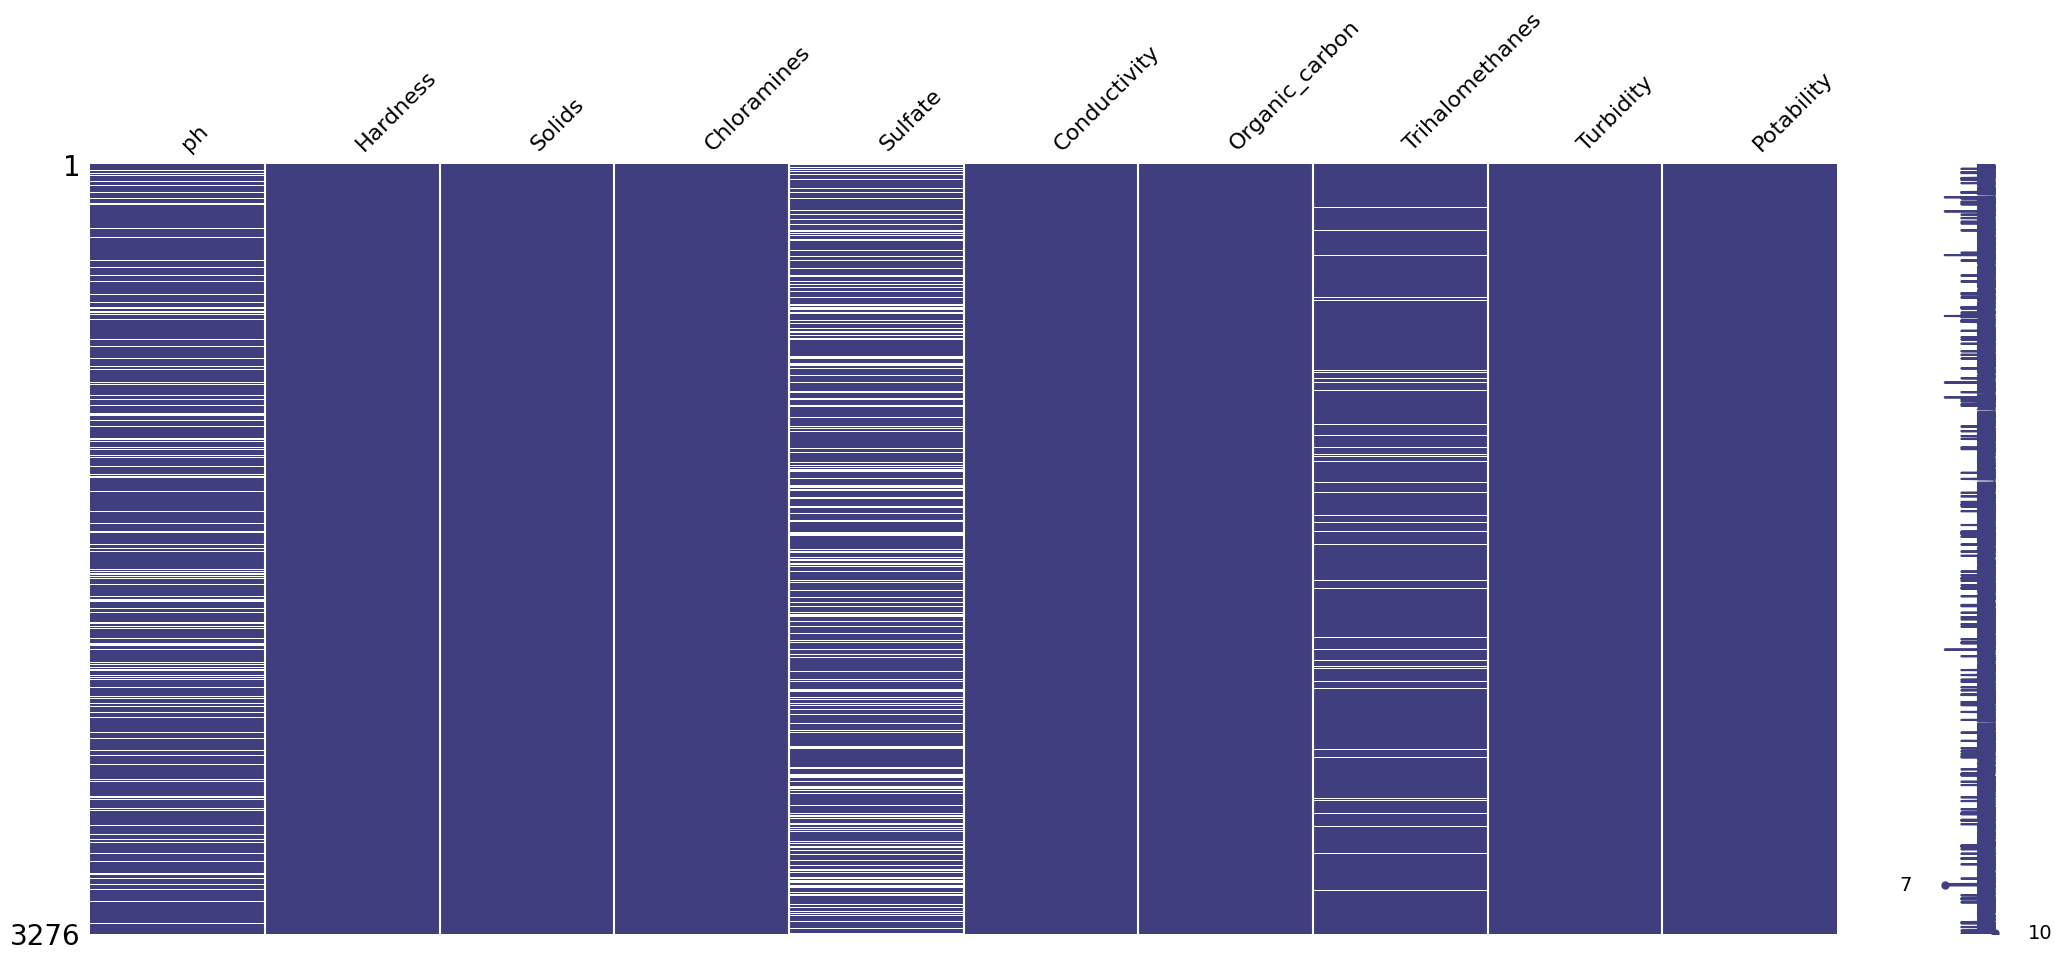

In [6]:
fig = msno.matrix(df,color=(0.25,0.25,0.5))

In [7]:
d = pd.DataFrame(df['Potability'].value_counts())
fig = px.pie(d,values='count',names=['Not Potable','Potable'],hole=0.4,opacity=0.8,
            color_discrete_sequence=[colors_primary[3],colors_secondary[3]],
            labels={'count':'Number of Samples'})

fig.add_annotation(text='Potability',x=0.5,y=0.5,showarrow=False,
                   font_size=14,opacity=opacity,font_family='arial')
fig.update_layout(
    font_family='arial',
    title=dict(text='Potability Distribution (Before Resampling)',x=0.5,y=0.96,
    font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=0.38,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

In [8]:
df = df.dropna()
notpotable  = df[df['Potability']==0]
potable = df[df['Potability']==1]

df_minority_upsampled = resample(potable, replace = True, n_samples = 1200)
df = pd.concat([notpotable, df_minority_upsampled])
df = shuffle(df)

In [9]:
d = pd.DataFrame(df['Potability'].value_counts())
fig = px.pie(d,values='count',names=['Not Potable','Potable'],hole=0.4,opacity=0.8,
            color_discrete_sequence=[colors_primary[3],colors_secondary[3]],
            labels={'count':'Number of Samples'})

fig.add_annotation(text='Potability',x=0.5,y=0.5,showarrow=False,
                   font_size=14,opacity=opacity,font_family='arial')
fig.update_layout(
    font_family='arial',
    title=dict(text='Potability Distribution (After Resampling)',x=0.5,y=0.96,
    font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=0.38,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

In [10]:
fig = px.histogram(df, x='Hardness', color='Potability', template='plotly_white',
                   marginal='box', opacity=opacity, nbins=binsize, color_discrete_sequence=[colors_primary[3], colors_secondary[3]],
                   barmode='group', histfunc='count')

fig.add_annotation(text='<76 mg/L is<br> considered soft',
                   x=40, y=130, showarrow=False, font_size=9)
fig.add_annotation(text='Between 76 and 150<br> (mg/L) is<br>moderately hard',
                   x=113, y=130, showarrow=False, font_size=9)
fig.add_annotation(text='Between 151 and 300 (mg/L)<br> is considered hard',
                   x=250, y=130, showarrow=False, font_size=9)
fig.add_annotation(text='>300 mg/L is<br> considered very hard',
                   x=340, y=130, showarrow=False, font_size=9)
fig.update_layout(
    font_family='arial',
    title=dict(text='Hardness Distribution', x=0.50, y=0.95,
               font=dict(color=colors_dark[2], size=20)),
    xaxis_title_text='Hardness (mg/L)',
    yaxis_title_text='Count',
    legend=dict(
        x=1, y=0.96, bordercolor=colors_dark[4], borderwidth=0, tracegroupgap=5, traceorder='reversed'),
    bargap=0.3, hoverlabel=dict(bgcolor='white'))
fig.update_traces(name='Not Potable', selector=dict(name='0'))
fig.update_traces(name='Potable', selector=dict(name='1'))

fig.show()


In [11]:
fig = px.histogram(df,x='ph',color='Potability',template='plotly_white',
                  marginal='box',opacity=opacity,nbins=binsize,color_discrete_sequence=[colors_primary[3],colors_secondary[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='<7 is Acidic',x=4,y=70,showarrow=False,font_size=10)
fig.add_annotation(text='>7 is Basic',x=10,y=70,showarrow=False,font_size=10)
fig.update_layout(
    font_family='arial',
    title=dict(text='pH Level Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='pH Level',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5, traceorder='reversed'),
    bargap=0.3, hoverlabel=dict(bgcolor='white'))
fig.update_traces(name='Not Potable', selector=dict(name='0'))
fig.update_traces(name='Potable', selector=dict(name='1'))

fig.show()

In [12]:
fig = px.histogram(df,x='Solids',color='Potability',template='plotly_white',
                  marginal='box',opacity=opacity,nbins=binsize,color_discrete_sequence=[colors_primary[3],colors_secondary[3]],
                  barmode='group',histfunc='count')

fig.update_layout(
    font_family='arial',
    title=dict(text='Distribution Of Total Dissolved Solids',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Dissolved Solids (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5, traceorder='reversed'),
    bargap=0.3, hoverlabel=dict(bgcolor='white'))
fig.update_traces(name='Not Potable', selector=dict(name='0'))
fig.update_traces(name='Potable', selector=dict(name='1'))

fig.show()

In [13]:
fig = px.histogram(df,x='Chloramines',color='Potability',template='plotly_white',
                  marginal='box',opacity=opacity,nbins=binsize,color_discrete_sequence=[colors_primary[3],colors_secondary[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='<4 ppm is considered<br> safe for drinking',x=1.8,y=90,showarrow=False)
fig.update_layout(
    font_family='arial',
    title=dict(text='Chloramines Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Chloramines (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5,traceorder='reversed'),
    bargap=0.3, hoverlabel=dict(bgcolor='white'))
fig.update_traces(name='Not Potable', selector=dict(name='0'))
fig.update_traces(name='Potable', selector=dict(name='1'))

fig.show()

In [14]:
fig = px.histogram(df,x='Sulfate',color='Potability',template='plotly_white',
                  marginal='box',opacity=opacity,nbins=binsize,color_discrete_sequence=[colors_primary[3],colors_secondary[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='<250 mg/L is considered<br> safe for drinking',x=175,y=90,showarrow=False)
fig.update_layout(
    font_family='arial',
    title=dict(text='Sulfate Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Sulfate (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5,traceorder='reversed'),
    bargap=0.3, hoverlabel=dict(bgcolor='white'))
fig.update_traces(name='Not Potable', selector=dict(name='0'))
fig.update_traces(name='Potable', selector=dict(name='1'))

fig.show()

In [15]:
fig = px.histogram(df,x='Conductivity',color='Potability',template='plotly_white',
                  marginal='box',opacity=opacity,nbins=binsize,color_discrete_sequence=[colors_primary[3],colors_secondary[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='The Conductivity range <br> is safe for both (200-800),<br> Potable and Non-Potable water',
                   x=600,y=90,showarrow=False)
fig.update_layout(
    font_family='arial',
    title=dict(text='Conductivity Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Conductivity (μS/cm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5,traceorder='reversed'),
    bargap=0.3, hoverlabel=dict(bgcolor='white'))
fig.update_traces(name='Not Potable', selector=dict(name='0'))
fig.update_traces(name='Potable', selector=dict(name='1'))

fig.show()

In [16]:
fig = px.histogram(df,x='Organic_carbon',color='Potability',template='plotly_white',
                  marginal='box',opacity=opacity,nbins=binsize,color_discrete_sequence=[colors_primary[3],colors_secondary[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='Typical Organic Carbon<br> level is upto 10 ppm',x=5.3,y=110,showarrow=False)
fig.update_layout(
    font_family='arial',
    title=dict(text='Organic Carbon Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Organic Carbon (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5,traceorder='reversed'),
    bargap=0.3, hoverlabel=dict(bgcolor='white'))
fig.update_traces(name='Not Potable', selector=dict(name='0'))
fig.update_traces(name='Potable', selector=dict(name='1'))

fig.show()

In [17]:
fig = px.histogram(df,x='Trihalomethanes',color='Potability',template='plotly_white',
                  marginal='box',opacity=opacity,nbins=binsize,color_discrete_sequence=[colors_primary[3],colors_secondary[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='Upper limit of Trihalomethanes<br> level is 80 μg/L',x=115,y=90,showarrow=False)
fig.update_layout(
    font_family='arial',
    title=dict(text='Trihalomethanes Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Trihalomethanes (μg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5,traceorder='reversed'),
    bargap=0.3, hoverlabel=dict(bgcolor='white'))
fig.update_traces(name='Not Potable', selector=dict(name='0'))
fig.update_traces(name='Potable', selector=dict(name='1'))

fig.show()

In [18]:
fig = px.histogram(df,x='Turbidity',color='Potability',template='plotly_white',
                  marginal='box',opacity=opacity,nbins=binsize,color_discrete_sequence=[colors_primary[3],colors_secondary[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='<5 NTU Turbidity is<br> considered safe',x=6,y=90,showarrow=False)
fig.update_layout(
    font_family='arial',
    title=dict(text='Turbidity Distribution',x=0.5,y=0.95,
    font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Turbidity (NTU)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5,traceorder='reversed'),
    bargap=0.3, hoverlabel=dict(bgcolor='white'))
fig.update_traces(name='Not Potable', selector=dict(name='0'))
fig.update_traces(name='Potable', selector=dict(name='1'))

fig.show()

In [19]:
fig = px.scatter_matrix(df,df.drop('Potability',axis=1),height=1250,width=1250,template='plotly_white',opacity=opacity,
                        color_discrete_sequence=[colors_secondary[3],colors_primary[3]],color='Potability',
                        symbol='Potability',color_continuous_scale=[colors_primary[3],colors_secondary[3]])

fig.update_layout(font_family='arial',font_size=10,
                  coloraxis_showscale=False,
                  legend=dict(x=0.02,y=1.07,bgcolor=colors_dark[4],traceorder='reversed'),
                  title=dict(text='Scatter Plot matrix between features',x=0.5,y=0.97,
                  font=dict(color=colors_dark[2],size=24)))
fig.update_traces(name='Not Potable', selector=dict(name='0'))
fig.update_traces(name='Potable', selector=dict(name='1'))
fig.show()

In [20]:
features_to_normalize = df.drop(['Potability'], axis=1)
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features_to_normalize)
normalized_df = pd.DataFrame(normalized_features, columns=features_to_normalize.columns)
df.reset_index(drop=True, inplace=True)
normalized_df['Potability'] = df['Potability']
df = normalized_df
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.710669,0.570949,0.156042,0.494845,0.609510,0.222989,0.323020,0.728337,0.475058,1
1,0.562265,0.308212,0.526622,0.534357,0.750017,0.317718,0.692665,0.602853,0.196073,0
2,0.471992,0.530935,0.402778,0.534513,0.462918,0.224602,0.588079,0.436518,0.586887,0
3,0.608710,0.193173,0.566814,0.720344,0.278722,0.254812,0.433245,0.393104,0.627266,1
4,0.547922,0.754733,0.381358,0.409338,0.714310,0.279510,0.488761,0.511227,0.513598,1
...,...,...,...,...,...,...,...,...,...,...
2395,0.350716,0.248885,0.194683,0.427785,1.000000,0.685988,0.531723,0.305879,0.339747,1
2396,0.512953,0.412462,0.600936,0.691959,0.262473,0.423198,0.568137,0.633436,0.598030,1
2397,0.573368,0.559312,0.467035,0.609227,0.458251,0.416887,0.317479,0.480036,0.649082,0
2398,0.474861,0.542602,0.371972,0.327355,0.235539,0.241581,0.444006,0.617607,0.366768,1


In [21]:
corr = df.corr()
corr["Potability"].sort_values(ascending=False)

,Potability
Potability,1.000000
Solids,0.048064
Turbidity,0.043453
ph,0.015300
Chloramines,0.011949
Trihalomethanes,0.007083
Organic_carbon,-0.004978
Hardness,-0.011576
Conductivity,-0.022321
Sulfate,-0.035801


In [22]:
fig = px.imshow(corr,height=1200,width=1200,template='plotly_white',text_auto=True)
fig.update_layout(font_family='arial',
                title=dict(text='Correlation Heatmap',x=0.5,y=0.93,
                font=dict(color=colors_dark[2],size=24)),
                coloraxis_colorbar=dict(len=0.85,x=1.1))
fig.show()

In [23]:
x = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.1)

In [25]:
### TYPE 1

In [26]:
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
xgb = XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)


para_knn = {'n_neighbors':np.arange(1, 50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) #search knn for 5 fold cross validation

#Decision Tree
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

#AdaBoost
params_ada = {'n_estimators': [50,100,250,400,500,600], 'learning_rate': [0.2,0.5,0.8,1]}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

#XGBoost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)

In [ ]:
grid_knn.fit(X_train, Y_train)
grid_dt.fit(X_train, Y_train)
grid_rf.fit(X_train, Y_train)
grid_ada.fit(X_train, Y_train)
rs_xgb.fit(X_train, Y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

In [ ]:
models = [('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
          ('XGBoost', xgb)]


for model_name, model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    print('{:s} : {:.6f}'.format(model_name, accuracy))

In [ ]:
### TYPE 2

In [ ]:
filterwarnings('ignore')
models =[("LR", LogisticRegression(max_iter=1000)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),("NuSVC", NuSVC()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),('XGB',GradientBoostingClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, Y_train)
    model_results = model.predict(X_test)
    score = precision_score(Y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))

finalResults.sort(key=lambda k:k[1],reverse=True)


In [ ]:
# Save the best performing model
print("\n--- Saving Best Model ---")
best_model_name, best_score = finalResults[0]
print(f"Best model: {best_model_name} with score: {best_score:.6f}")

# Find the best model in our models list
best_model = None
for name, model in models:
    if name == best_model_name:
        best_model = model
        break

if best_model:
    # Mount Google Drive to save the model
    drive.mount('/content/drive')

    # Create directory if it doesn't exist
    save_dir = '/content/drive/MyDrive/water_quality_models'
    os.makedirs(save_dir, exist_ok=True)

    # Save the model using joblib (more efficient for sklearn models)
    model_path = f'{save_dir}/best_model_{best_model_name}.joblib'
    joblib.dump(best_model, model_path)

    # Also save the scaler for preprocessing new data
    scaler_path = f'{save_dir}/minmax_scaler.joblib'
    joblib.dump(scaler, scaler_path)

    print(f"Model saved to: {model_path}")
    print(f"Scaler saved to: {scaler_path}")

    # Example code for loading and using the model
    print("\n--- Example code to load and use the model ---")
    print("# Load the saved model and scaler")
    print("loaded_model = joblib.load('/content/drive/MyDrive/water_quality_models/best_model_" + best_model_name + ".joblib')")
    print("loaded_scaler = joblib.load('/content/drive/MyDrive/water_quality_models/minmax_scaler.joblib')")
    print("\n# Prepare new data (example)")
    print("new_data = pd.DataFrame({  # Replace with your new data")
    print("    'ph': [7.5],")
    print("    'Hardness': [200.1],")
    print("    'Solids': [8368],")
    print("    'Chloramines': [6.5],")
    print("    'Sulfate': [223],")
    print("    'Conductivity': [468],")
    print("    'Organic_carbon': [11.3],")
    print("    'Trihalomethanes': [66.9],")
    print("    'Turbidity': [4.1]")
    print("})")
    print("\n# Normalize new data using the same scaler")
    print("normalized_new_data = loaded_scaler.transform(new_data)")
    print("\n# Make prediction")
    print("prediction = loaded_model.predict(normalized_new_data)")
    print("print('Water potability prediction:', 'Potable' if prediction[0] == 1 else 'Not Potable')")

In [ ]:
finalResults

In [ ]:
# Install gradio if not already installed
!pip install gradio -q

import gradio as gr
import pandas as pd
import joblib
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=False)

# Load the saved model and scaler
loaded_model = joblib.load('/content/drive/MyDrive/water_quality_models/best_model_RF.joblib')
loaded_scaler = joblib.load('/content/drive/MyDrive/water_quality_models/minmax_scaler.joblib')

# Define the prediction function
def predict_water_quality(ph, hardness, solids, chloramines, sulfate, conductivity, organic_carbon, trihalomethanes, turbidity):
    # Create a dataframe with the input values
    input_data = pd.DataFrame({
        'ph': [float(ph)],
        'Hardness': [float(hardness)],
        'Solids': [float(solids)],
        'Chloramines': [float(chloramines)],
        'Sulfate': [float(sulfate)],
        'Conductivity': [float(conductivity)],
        'Organic_carbon': [float(organic_carbon)],
        'Trihalomethanes': [float(trihalomethanes)],
        'Turbidity': [float(turbidity)]
    })

    # Normalize the data
    normalized_data = loaded_scaler.transform(input_data)

    # Make prediction
    prediction = loaded_model.predict(normalized_data)[0]
    probability = loaded_model.predict_proba(normalized_data)[0][1]

    # Return result
    result = "Potable" if prediction == 1 else "Not Potable"
    confidence = f"{probability*100:.2f}%" if prediction == 1 else f"{(1-probability)*100:.2f}%"

    return result, confidence

# Define parameter ranges for sliders
ph_slider = gr.Slider(label="pH Level", minimum=0, maximum=14, value=7.0, step=0.1,
                    info="Measure of acidity/basicity (0-14)")
hardness_slider = gr.Slider(label="Hardness", minimum=0, maximum=500, value=200, step=1,
                          info="Capacity of water to precipitate soap (mg/L)")
solids_slider = gr.Slider(label="Solids", minimum=0, maximum=60000, value=25000, step=100,
                        info="Total dissolved solids (ppm)")
chloramines_slider = gr.Slider(label="Chloramines", minimum=0, maximum=15, value=7, step=0.1,
                             info="Disinfectant (ppm)")
sulfate_slider = gr.Slider(label="Sulfate", minimum=0, maximum=500, value=250, step=1,
                         info="Sulfate concentration (mg/L)")
conductivity_slider = gr.Slider(label="Conductivity", minimum=0, maximum=1000, value=500, step=1,
                              info="Electrical conductivity (μS/cm)")
organic_carbon_slider = gr.Slider(label="Organic Carbon", minimum=0, maximum=30, value=10, step=0.1,
                                info="Amount of organic carbon (ppm)")
trihalomethanes_slider = gr.Slider(label="Trihalomethanes", minimum=0, maximum=150, value=75, step=0.1,
                                 info="Concentration of disinfection by-products (μg/L)")
turbidity_slider = gr.Slider(label="Turbidity", minimum=0, maximum=10, value=4, step=0.01,
                           info="Measure of water clarity (NTU)")

# Create the interface
demo = gr.Interface(
    fn=predict_water_quality,
    inputs=[
        ph_slider, hardness_slider, solids_slider, chloramines_slider,
        sulfate_slider, conductivity_slider, organic_carbon_slider,
        trihalomethanes_slider, turbidity_slider
    ],
    outputs=[
        gr.Textbox(label="Prediction"),
        gr.Textbox(label="Confidence")
    ],
    title="Water Quality Prediction",
    description="Enter water parameters to predict if water is potable or not",
    theme="huggingface",
    examples=[
        [7.5, 200.1, 8368, 6.5, 223, 468, 11.3, 66.9, 4.1],  # Example values
        [8.1, 214.3, 22018, 8.1, 356.9, 363.2, 18.4, 100.3, 4.6],
        [6.3, 129.4, 12988, 7.2, 152.8, 602.5, 7.9, 73.1, 2.1]
    ]
)

# Launch the app
demo.launch(share=True, debug=True)